In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# For plotting and visualisation
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('2017-18.csv', encoding="iso-8859-1") 
df.head()

,date,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink
0,02/01/2017,Bitcoin shoots to the moon Its now gone up pas...,0,0,MdfJumpers,8.160000e+17,NaN,NaN,NaN,https://twitter.com/MdfJumpers/status/81607154...
1,02/01/2017,"""El bitcoin supera los 1.000 dlares por primer...",2,1,Securityartwork,8.160000e+17,NaN,NaN,#tecnolog,https://twitter.com/Securityartwork/status/816...
2,02/01/2017,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,BogdanSTRB,8.160000e+17,NaN,NaN,#bitcoin #miner,https://twitter.com/BogdanSTRB/status/81607144...
3,02/01/2017,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,BlackBullTradn,8.160000e+17,NaN,NaN,NaN,https://twitter.com/BlackBullTradn/status/8160...
4,02/01/2017,Le Bitcoin a franchi le seuil psychologique de...,0,0,BritesClifford,8.160000e+17,NaN,@Boursier_com,NaN,https://twitter.com/BritesClifford/status/8160...


In [3]:
df.tail()

,date,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink
170186,31/01/2018,"Non eu resident here. If we have XRB, will we ...",0,2,AFLVegas,9.590000e+17,NaN,NaN,NaN,https://twitter.com/AFLVegas/status/9588479991...
170187,31/01/2018,Square is rolling out bitcoin trading to most ...,0,0,bitbrokersinc,9.590000e+17,NaN,NaN,#bitcoin,https://twitter.com/bitbrokersinc/status/95884...
170188,31/01/2018,#HTMLCOIN Ready for lift off. Crypto market wi...,8,11,stefjoe123,9.590000e+17,NaN,NaN,#HTMLCOIN #bitcoin #verge #lsk #xml #ethereum ...,https://twitter.com/stefjoe123/status/95884799...
170189,31/01/2018,"Don't let your Bitcoin sit on an exchange, COP...",0,0,ShillMeister1,9.590000e+17,NaN,NaN,NaN,https://twitter.com/ShillMeister1/status/95884...
170190,31/01/2018,The dollar is going to zero. Buy bitcoin .,0,0,hotrodder99,9.590000e+17,NaN,NaN,NaN,https://twitter.com/hotrodder99/status/9588479...


### Tweets
1. How many tweets – table tweets.describe()
2. How many post drop missing tweets – tweets.describe() 
2. Distribution of tweets over time – bar chart 
4. Calculate sentiment of each tweet
5. Use wordcloud for positive, negative, neutral tweets
https://www.kaggle.com/rashmitarouy01/us-airlines-twitter-sentiment-analysis
6. Polarity of sentiment over time – scatter plot don’t convert into >1 positive, <0 negative keep as continuous for now


In [4]:
# 1.How many tweets – table tweets.describe()
df.describe()

,retweets,favorites,id,geo
count,170191.000000,170191.000000,1.701910e+05,0.0
mean,1.780705,2.421009,9.070108e+17,NaN
std,53.317995,68.961340,3.403749e+16,NaN
min,0.000000,0.000000,8.160000e+17,NaN
25%,0.000000,0.000000,8.840000e+17,NaN
50%,0.000000,0.000000,9.090000e+17,NaN
75%,0.000000,1.000000,9.360000e+17,NaN
max,6861.000000,12407.000000,9.590000e+17,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170191 entries, 0 to 170190
Data columns (total 10 columns):
date         170191 non-null object
tweets       170093 non-null object
retweets     170191 non-null int64
favorites    170191 non-null int64
username     170191 non-null object
id           170191 non-null float64
geo          0 non-null float64
mentions     21579 non-null object
hashtags     85584 non-null object
permalink    170191 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 13.0+ MB


In [6]:
pd.isnull(df).sum()
#any null values???

date              0
tweets           98
retweets          0
favorites         0
username          0
id                0
geo          170191
mentions     148612
hashtags      84607
permalink         0
dtype: int64

In [7]:
df.dropna(subset=['tweets'], inplace=True)

In [8]:
# 2.How many post clean – tweets.describe()
pd.isnull(df).any()

date         False
tweets       False
retweets     False
favorites    False
username     False
id           False
geo           True
mentions      True
hashtags      True
permalink    False
dtype: bool

In [9]:
df.describe()

,retweets,favorites,id,geo
count,170093.000000,170093.000000,1.700930e+05,0.0
mean,1.781719,2.421899,9.070041e+17,NaN
std,53.333336,68.981188,3.404089e+16,NaN
min,0.000000,0.000000,8.160000e+17,NaN
25%,0.000000,0.000000,8.840000e+17,NaN
50%,0.000000,0.000000,9.090000e+17,NaN
75%,0.000000,1.000000,9.360000e+17,NaN
max,6861.000000,12407.000000,9.590000e+17,NaN


In [10]:
df.duplicated().sum()

51

In [11]:
df['tweets'].duplicated().sum()
# drop duplicates from same person?

15194

In [12]:
# 3.Distribution of tweets over time – bar chart
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

# should always set index to datetime with time series
df.head()

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink
date,,,,,,,,,
2017-01-02,Bitcoin shoots to the moon Its now gone up pas...,0,0,MdfJumpers,8.160000e+17,NaN,NaN,NaN,https://twitter.com/MdfJumpers/status/81607154...
2017-01-02,"""El bitcoin supera los 1.000 dlares por primer...",2,1,Securityartwork,8.160000e+17,NaN,NaN,#tecnolog,https://twitter.com/Securityartwork/status/816...
2017-01-02,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,BogdanSTRB,8.160000e+17,NaN,NaN,#bitcoin #miner,https://twitter.com/BogdanSTRB/status/81607144...
2017-01-02,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,BlackBullTradn,8.160000e+17,NaN,NaN,NaN,https://twitter.com/BlackBullTradn/status/8160...
2017-01-02,Le Bitcoin a franchi le seuil psychologique de...,0,0,BritesClifford,8.160000e+17,NaN,@Boursier_com,NaN,https://twitter.com/BritesClifford/status/8160...


In [13]:
df.tail()

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink
date,,,,,,,,,
2018-01-31,"Non eu resident here. If we have XRB, will we ...",0,2,AFLVegas,9.590000e+17,NaN,NaN,NaN,https://twitter.com/AFLVegas/status/9588479991...
2018-01-31,Square is rolling out bitcoin trading to most ...,0,0,bitbrokersinc,9.590000e+17,NaN,NaN,#bitcoin,https://twitter.com/bitbrokersinc/status/95884...
2018-01-31,#HTMLCOIN Ready for lift off. Crypto market wi...,8,11,stefjoe123,9.590000e+17,NaN,NaN,#HTMLCOIN #bitcoin #verge #lsk #xml #ethereum ...,https://twitter.com/stefjoe123/status/95884799...
2018-01-31,"Don't let your Bitcoin sit on an exchange, COP...",0,0,ShillMeister1,9.590000e+17,NaN,NaN,NaN,https://twitter.com/ShillMeister1/status/95884...
2018-01-31,The dollar is going to zero. Buy bitcoin .,0,0,hotrodder99,9.590000e+17,NaN,NaN,NaN,https://twitter.com/hotrodder99/status/9588479...


In [14]:
# Time index is formatted to per month
df2 = df['tweets'].resample('M').count()
df2.head()

date
2017-01-31     1000
2017-02-28     1001
2017-03-31    15192
2017-04-30      999
2017-05-31     1000
Freq: M, Name: tweets, dtype: int64

In [15]:
df2.tail()

date
2017-09-30    17980
2017-10-31    17982
2017-11-30    17985
2017-12-31    18991
2018-01-31    21985
Freq: M, Name: tweets, dtype: int64

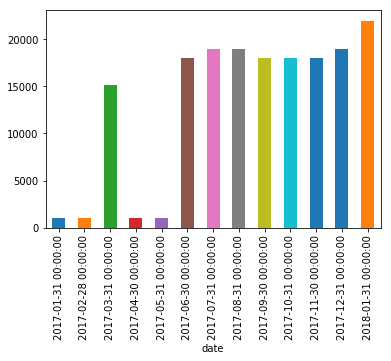

In [16]:
df2.plot.bar()

In [17]:
df2.to_csv('df2.csv')

Text(0,0.5,'No. of Tweets')

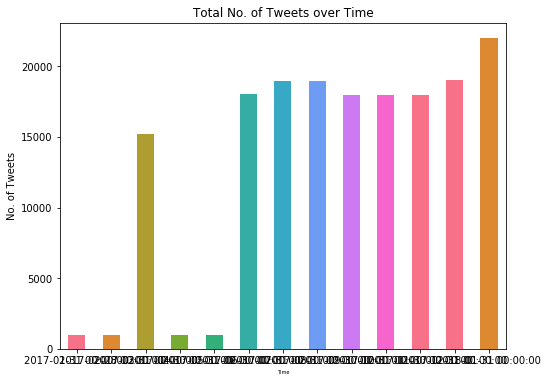

In [18]:
colors=sns.color_palette("husl", 10) 
pd.Series(df2).plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets over Time")
plt.xlabel('Time', fontsize=5)
plt.ylabel('No. of Tweets', fontsize=10)

In [19]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [20]:
def analyse_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity
    
#    testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
#>>> testimonial.sentiment
#Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
#>>> testimonial.sentiment.polarity
#0.39166666666666666

In [21]:
# We create a column with the result of the analysis:
df['SA'] = np.array([ analyse_sentiment(tweet) for tweet in df['tweets'] ])

# We display the updated dataframe with the new column:
display(df.head(10))

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink,SA
date,,,,,,,,,,
2017-01-02,Bitcoin shoots to the moon Its now gone up pas...,0,0,MdfJumpers,8.160000e+17,NaN,NaN,NaN,https://twitter.com/MdfJumpers/status/81607154...,-0.25
2017-01-02,"""El bitcoin supera los 1.000 dlares por primer...",2,1,Securityartwork,8.160000e+17,NaN,NaN,#tecnolog,https://twitter.com/Securityartwork/status/816...,0.00
2017-01-02,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,BogdanSTRB,8.160000e+17,NaN,NaN,#bitcoin #miner,https://twitter.com/BogdanSTRB/status/81607144...,0.00
2017-01-02,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,BlackBullTradn,8.160000e+17,NaN,NaN,NaN,https://twitter.com/BlackBullTradn/status/8160...,0.50
2017-01-02,Le Bitcoin a franchi le seuil psychologique de...,0,0,BritesClifford,8.160000e+17,NaN,@Boursier_com,NaN,https://twitter.com/BritesClifford/status/8160...,0.35
2017-01-02,Thanks BTCRulzEvrytngRounMe for following me! ...,0,0,BTCMaster,8.160000e+17,NaN,NaN,#bitcoin #ethereum #nocroom,https://twitter.com/BTCMaster/status/816071406...,0.10
2017-01-02,Just went to a bitcoin atm and got bitcoins!,0,0,tearsofash,8.160000e+17,NaN,NaN,NaN,https://twitter.com/tearsofash/status/81607139...,0.00
2017-01-02,The Times 03/ Jan/2009 Chancellor on brink of ...,0,0,Bitcoin_Spain,8.160000e+17,NaN,NaN,#bitcoin #btc,https://twitter.com/Bitcoin_Spain/status/81607...,0.00
2017-01-02,RT BitcoinRecycle: #Bitcoin Profits #Hariness ...,0,0,alt_bit_coins,8.160000e+17,NaN,NaN,#Bitcoin #Hariness #Digital #Domain #forex #fi...,https://twitter.com/alt_bit_coins/status/81607...,0.00


In [22]:
df.tail()

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink,SA
date,,,,,,,,,,
2018-01-31,"Non eu resident here. If we have XRB, will we ...",0,2,AFLVegas,9.590000e+17,NaN,NaN,NaN,https://twitter.com/AFLVegas/status/9588479991...,0.175
2018-01-31,Square is rolling out bitcoin trading to most ...,0,0,bitbrokersinc,9.590000e+17,NaN,NaN,#bitcoin,https://twitter.com/bitbrokersinc/status/95884...,0.500
2018-01-31,#HTMLCOIN Ready for lift off. Crypto market wi...,8,11,stefjoe123,9.590000e+17,NaN,NaN,#HTMLCOIN #bitcoin #verge #lsk #xml #ethereum ...,https://twitter.com/stefjoe123/status/95884799...,0.200
2018-01-31,"Don't let your Bitcoin sit on an exchange, COP...",0,0,ShillMeister1,9.590000e+17,NaN,NaN,NaN,https://twitter.com/ShillMeister1/status/95884...,0.050
2018-01-31,The dollar is going to zero. Buy bitcoin .,0,0,hotrodder99,9.590000e+17,NaN,NaN,NaN,https://twitter.com/hotrodder99/status/9588479...,0.000


In [23]:
pos=df['SA']==1
pos.value_counts()

False    169192
True        901
Name: SA, dtype: int64

In [24]:
neg=df['SA']==-1
neg.value_counts()

False    169888
True        205
Name: SA, dtype: int64

In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(df['tweets']) if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['tweets']) if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['tweets']) if df['SA'][index] < 0]

In [26]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['tweets'])))

Percentage of positive tweets: 32.3764058485652%
Percentage of neutral tweets: 56.77129570293898%
Percentage of negative tweets: 10.852298448495823%


In [27]:
df['positive'] = df['SA'] > 0
df['neutral'] = df['SA'] == 0
df['negative'] = df['SA'] < 0

In [28]:
df.head()

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink,SA,positive,neutral,negative
date,,,,,,,,,,,,,
2017-01-02,Bitcoin shoots to the moon Its now gone up pas...,0,0,MdfJumpers,8.160000e+17,NaN,NaN,NaN,https://twitter.com/MdfJumpers/status/81607154...,-0.25,False,False,True
2017-01-02,"""El bitcoin supera los 1.000 dlares por primer...",2,1,Securityartwork,8.160000e+17,NaN,NaN,#tecnolog,https://twitter.com/Securityartwork/status/816...,0.00,False,True,False
2017-01-02,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,BogdanSTRB,8.160000e+17,NaN,NaN,#bitcoin #miner,https://twitter.com/BogdanSTRB/status/81607144...,0.00,False,True,False
2017-01-02,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,BlackBullTradn,8.160000e+17,NaN,NaN,NaN,https://twitter.com/BlackBullTradn/status/8160...,0.50,True,False,False
2017-01-02,Le Bitcoin a franchi le seuil psychologique de...,0,0,BritesClifford,8.160000e+17,NaN,@Boursier_com,NaN,https://twitter.com/BritesClifford/status/8160...,0.35,True,False,False


In [29]:
df['positive'].value_counts()

False    115023
True      55070
Name: positive, dtype: int64

In [30]:
df['negative'].value_counts()

False    151634
True      18459
Name: negative, dtype: int64

In [31]:
# 5. Use wordcloud for positive, negative, neutral tweets
#visualization using wordcloud for the negative tweets
df2= df[df['positive']==1]
words = ' '.join(df2['tweets'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

In [32]:
from wordcloud import WordCloud,STOPWORDS

In [33]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

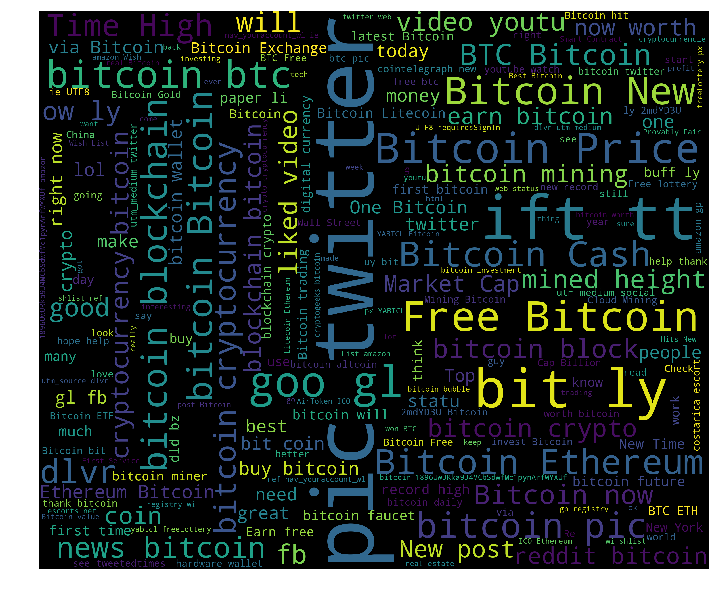

In [34]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

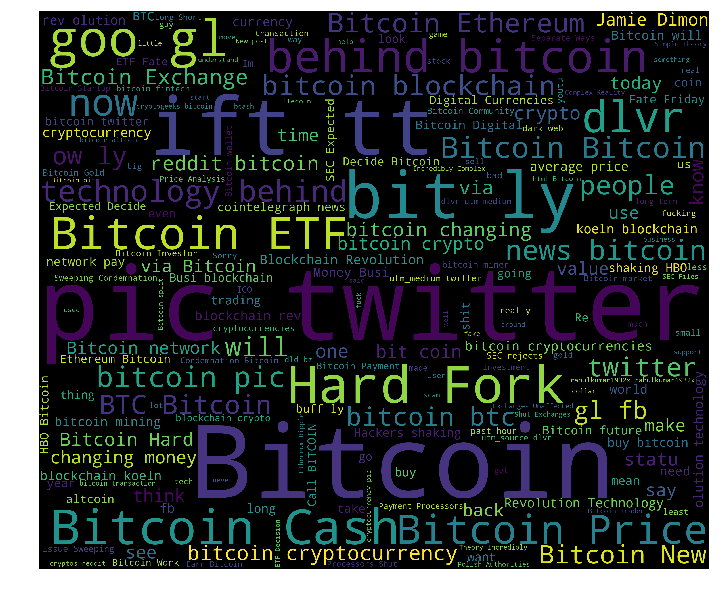

In [35]:
df2= df[df['negative']==1]
words = ' '.join(df2['tweets'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

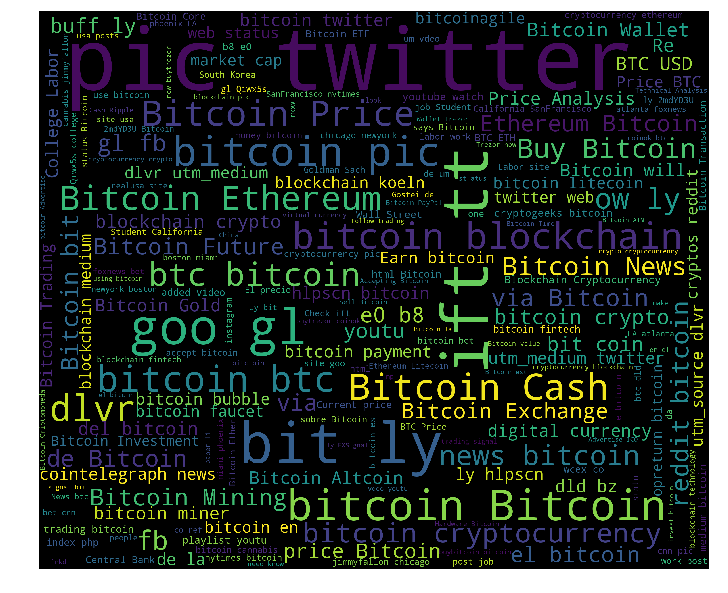

In [36]:
df2= df[df['neutral']==1]
words = ' '.join(df2['tweets'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
df3 = df['SA'].resample('M').mean()
df3.head()

date
2017-01-31    0.103428
2017-02-28    0.072399
2017-03-31    0.068503
2017-04-30    0.046453
2017-05-31    0.079788
Freq: M, Name: SA, dtype: float64

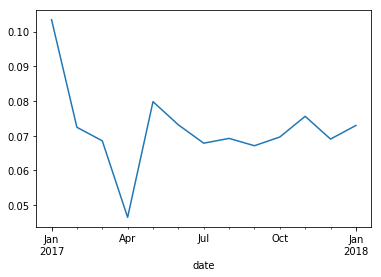

In [38]:
df3.plot(kind='line')

In [39]:
df.head()

,tweets,retweets,favorites,username,id,geo,mentions,hashtags,permalink,SA,positive,neutral,negative
date,,,,,,,,,,,,,
2017-01-02,Bitcoin shoots to the moon Its now gone up pas...,0,0,MdfJumpers,8.160000e+17,NaN,NaN,NaN,https://twitter.com/MdfJumpers/status/81607154...,-0.25,False,False,True
2017-01-02,"""El bitcoin supera los 1.000 dlares por primer...",2,1,Securityartwork,8.160000e+17,NaN,NaN,#tecnolog,https://twitter.com/Securityartwork/status/816...,0.00,False,True,False
2017-01-02,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,BogdanSTRB,8.160000e+17,NaN,NaN,#bitcoin #miner,https://twitter.com/BogdanSTRB/status/81607144...,0.00,False,True,False
2017-01-02,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,BlackBullTradn,8.160000e+17,NaN,NaN,NaN,https://twitter.com/BlackBullTradn/status/8160...,0.50,True,False,False
2017-01-02,Le Bitcoin a franchi le seuil psychologique de...,0,0,BritesClifford,8.160000e+17,NaN,@Boursier_com,NaN,https://twitter.com/BritesClifford/status/8160...,0.35,True,False,False


In [40]:
df4 = df['SA'].resample('D').mean()
df4.head()

date
2017-01-02    0.103428
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
Freq: D, Name: SA, dtype: float64

In [41]:
df4 = df4.dropna()
df4.head()

date
2017-01-02    0.103428
2017-02-14    0.000000
2017-02-28    0.072472
2017-03-01    0.081296
2017-03-02    0.100104
Name: SA, dtype: float64

https://machinelearningmastery.com/time-series-data-visualization-with-python/ 

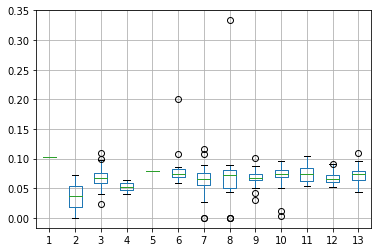

In [42]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
groups = df4.groupby(pd.Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,14)
months.boxplot()
pyplot.show()

In [43]:
df4.describe()

count    187.000000
mean       0.070654
std        0.029964
min        0.000000
25%        0.062509
50%        0.070605
75%        0.080169
max        0.333333
Name: SA, dtype: float64

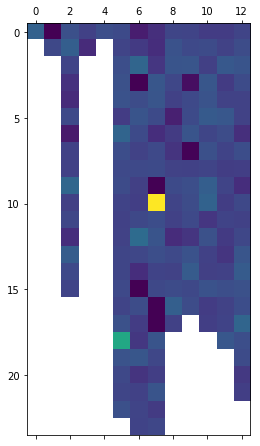

In [44]:
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

In [45]:
months.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.103428,0.000000,0.081296,0.064633,0.079788,0.074278,0.027183,0.044515,0.070122,0.068827,0.059812,0.059349,0.068897
1,NaN,0.072472,0.100104,0.040953,NaN,0.067820,0.057041,0.043657,0.083743,0.073339,0.076800,0.066405,0.078086
2,NaN,NaN,0.069008,NaN,NaN,0.080126,0.108333,0.053011,0.087164,0.087355,0.062694,0.091754,0.086071
3,NaN,NaN,0.047613,NaN,NaN,0.082525,0.000000,0.089712,0.070729,0.011981,0.088795,0.058554,0.076313
4,NaN,NaN,0.041050,NaN,NaN,0.083875,0.078016,0.087771,0.064098,0.073652,0.084870,0.065214,0.065640


In [46]:
months.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13
19,NaN,NaN,NaN,NaN,NaN,0.085031,0.089054,0.070791,NaN,NaN,NaN,NaN,0.076447
20,NaN,NaN,NaN,NaN,NaN,0.071644,0.049497,0.062260,NaN,NaN,NaN,NaN,0.055467
21,NaN,NaN,NaN,NaN,NaN,0.069424,0.064608,0.086394,NaN,NaN,NaN,NaN,0.061428
22,NaN,NaN,NaN,NaN,NaN,0.081712,0.068166,0.057642,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,0.066839,0.070671,NaN,NaN,NaN,NaN,NaN


### Bitcoin price 
· Plot over time - line


In [49]:
btc = pd.read_csv('Bitcoin.csv') 
btc.head()

,Date,Close Price
0,08/04/2018 00:00,6896.28
1,08/04/2018 00:01,6893.19
2,08/04/2018 00:02,6893.84
3,08/04/2018 00:03,6898.34
4,08/04/2018 00:04,6900.42


In [50]:
btc.describe()

,Close Price
count,2880.000000
mean,6939.820976
std,147.960156
min,6616.570000
25%,6756.925000
50%,6972.465000
75%,7056.347500
max,7170.760000


In [51]:
btc['Date'] = pd.to_datetime(btc['Date'], dayfirst=True)

btc.set_index('Date', inplace=True)
# should always set index to datetime with time series

In [52]:
btc.head()

,Close Price
Date,
2018-04-08 00:00:00,6896.28
2018-04-08 00:01:00,6893.19
2018-04-08 00:02:00,6893.84
2018-04-08 00:03:00,6898.34
2018-04-08 00:04:00,6900.42


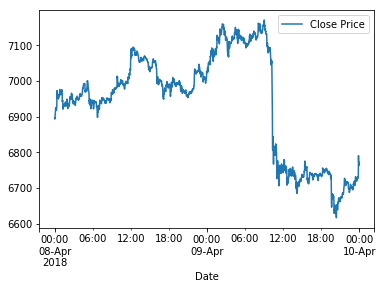

In [53]:
btc.plot()

### Bitcoin & Tweets
#Merge Tweets and bitcoin price and resample daily.median()
#Plot polarity of tweets (scatter) and price (line) on same chart per day


In [54]:
df5 = df.filter(['tweets', 'retweets', 'favorites','SA','positive', 'neutral', 'negative'], axis=1)
df5.head()

,tweets,retweets,favorites,SA,positive,neutral,negative
date,,,,,,,
2017-01-02,Bitcoin shoots to the moon Its now gone up pas...,0,0,-0.25,False,False,True
2017-01-02,"""El bitcoin supera los 1.000 dlares por primer...",2,1,0.00,False,True,False
2017-01-02,#bitcoin #miner NIB Bitmain Antminer APW3+-12-...,0,0,0.00,False,True,False
2017-01-02,"coindesk: The latest Bitcoin Price Index is 1,...",0,0,0.50,True,False,False
2017-01-02,Le Bitcoin a franchi le seuil psychologique de...,0,0,0.35,True,False,False


In [55]:
df5=df5.merge(btc, left_index=True, right_index=True, how='inner')
df5.head()

,tweets,retweets,favorites,SA,positive,neutral,negative,Close Price


In [58]:
df5.to_csv('merged_data.csv')